# Task 2 test case Danilova Aitalina

We have a dataset of loan applications that were submitted to the bank. Perform exploratory data analysis to find correlations and insights in this dataset.

Suggested steps:
- Preprocess data for an upcoming EDA.
- Identify target variable.
- Perform an EDA.
- Write conclusions and recommendations that you gained from EDA.

In [267]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import colors
from plotly import graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [268]:
#Reading data as dataframes
data = pd.read_csv('C:/Users/petrd/Downloads/test_case/loans - loans.csv')

## Data profiling

In [269]:
#Dimensions of dataset
data.shape

(614, 13)

In [270]:
# getting first 10 rows of df table
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [271]:
#Information about the data types of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [272]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The dataset has 614 rows and 13 columns:
1. We need to change the data type to int in the columns:
- CoapplicantIncome  
- LoanAmount  
- Loan_Amount_Term 
- Credit_History
2. need to give names to the snake register
3. need to process missing values

## Data preprocessing

In [273]:
#list of column names of the data table
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [274]:
# reduction to snake register
data.columns = data.columns.str.lower()

In [275]:
#check
data.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [276]:
data['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [277]:
data['dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [278]:
data['property_area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [279]:
data['credit_history'].unique()

array([ 1.,  0., nan])

In [280]:
data = data.replace({ 
    'Y':'Yes', 
    'N':'No' 
}) 

### Missing values

In [281]:
#Checking if there are any missing values
for col in data.columns:
    missing_data = np.mean(data[col].isnull())
    print('percentage of absences {} - {}%'.format(col, round(missing_data*100)))

percentage of absences loan_id - 0%
percentage of absences gender - 2%
percentage of absences married - 0%
percentage of absences dependents - 2%
percentage of absences education - 0%
percentage of absences self_employed - 5%
percentage of absences applicantincome - 0%
percentage of absences coapplicantincome - 0%
percentage of absences loanamount - 4%
percentage of absences loan_amount_term - 2%
percentage of absences credit_history - 8%
percentage of absences property_area - 0%
percentage of absences loan_status - 0%


**Empty values indicate that not all information is available for some data. The reasons may be different: for example, information is not specified, or the entry itself is incorrect.**

In [282]:
#removing gaps since there are less than 10 percent of them
data= data.dropna()

In [283]:
#checking duplicates
data.duplicated().sum()

0

### Altering the data type of a column

In [284]:
#changing data type
data['coapplicantincome'] = data['coapplicantincome'].astype('int64')
data['loanamount'] = data['loanamount'].astype('int64')
data['loan_amount_term'] = data['loan_amount_term'].astype('int64')
data['credit_history'] = data['credit_history'].astype('int64')

In [285]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   loan_id            480 non-null    object
 1   gender             480 non-null    object
 2   married            480 non-null    object
 3   dependents         480 non-null    object
 4   education          480 non-null    object
 5   self_employed      480 non-null    object
 6   applicantincome    480 non-null    int64 
 7   coapplicantincome  480 non-null    int64 
 8   loanamount         480 non-null    int64 
 9   loan_amount_term   480 non-null    int64 
 10  credit_history     480 non-null    int64 
 11  property_area      480 non-null    object
 12  loan_status        480 non-null    object
dtypes: int64(5), object(8)
memory usage: 52.5+ KB


## Exploratory data analysis

In [286]:
data

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,No
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Yes
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Yes
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Yes
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Yes
610,LP002979,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Yes
611,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Yes
612,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Yes


### Customer profiling

In [287]:
gender = (
    pd.pivot_table(data, index='gender', values="loan_id", aggfunc="count")
    .rename(columns={'loan_id': "count"})
    .reset_index()
)

gender['percent']=gender['count']*100/gender['count'].sum()

gender

,gender,count,percent
0,Female,86,17.916667
1,Male,394,82.083333


In [288]:
family_status = (
    pd.pivot_table(data, index='married', values="loan_id", aggfunc="count")
    .rename(columns={'loan_id': "count"})
    .reset_index()
)

family_status['percent']=family_status['count']*100/family_status['count'].sum()

family_status

,married,count,percent
0,No,169,35.208333
1,Yes,311,64.791667


In [289]:
education = (
    pd.pivot_table(data, index='education', values="loan_id", aggfunc="count")
    .rename(columns={'loan_id': "count"})
    .reset_index()
)

education['percent']=education['count']*100/education['count'].sum()

education

,education,count,percent
0,Graduate,383,79.791667
1,Not Graduate,97,20.208333


In [290]:
place_of_residence = (
    pd.pivot_table(data, index='property_area', values="loan_id", aggfunc="count")
    .rename(columns={'loan_id': "count"})
    .reset_index()
)

place_of_residence['percent']=place_of_residence['count']*100/place_of_residence['count'].sum()

place_of_residence

,property_area,count,percent
0,Rural,139,28.958333
1,Semiurban,191,39.791667
2,Urban,150,31.250000


In [291]:
dependents = (
    pd.pivot_table(data, index="dependents", values="loan_id", aggfunc="count")
    .rename(columns={'loan_id': "count"})
    .reset_index()
)

dependents['percent']=dependents['count']*100/dependents['count'].sum()

dependents

,dependents,count,percent
0,0,274,57.083333
1,1,80,16.666667
2,2,85,17.708333
3,3+,41,8.541667


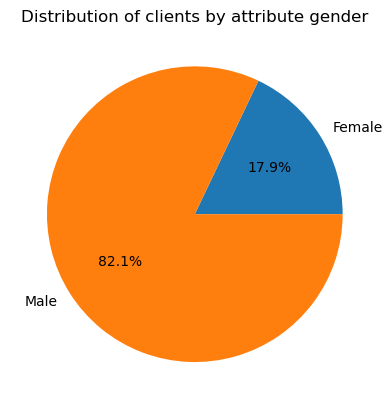

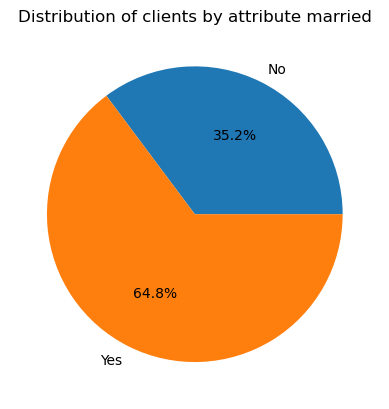

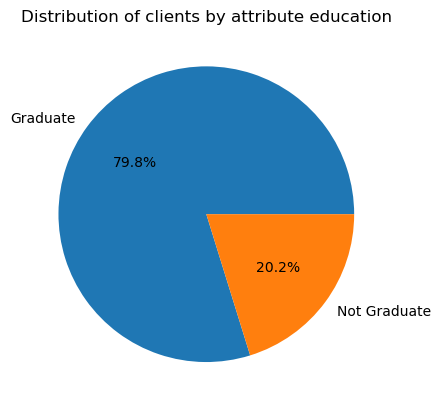

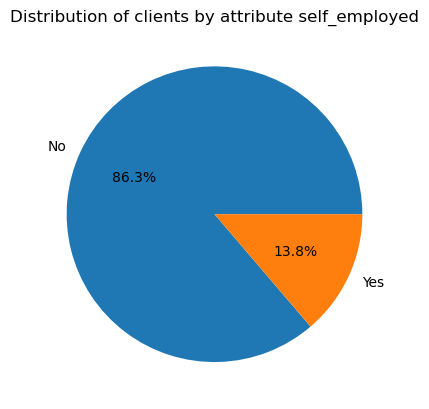

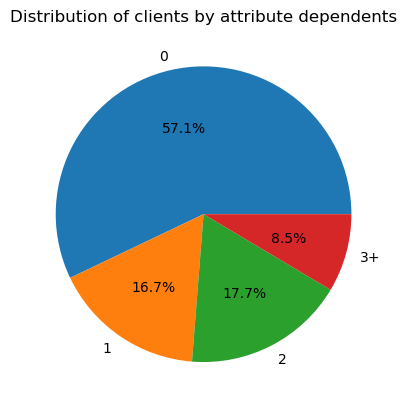

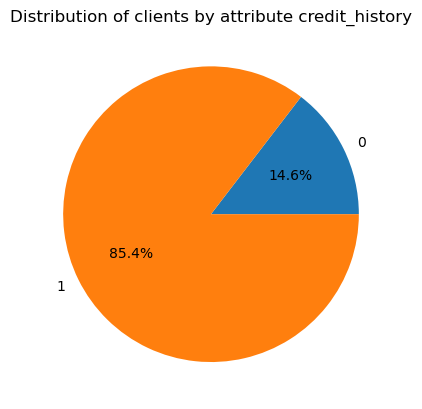

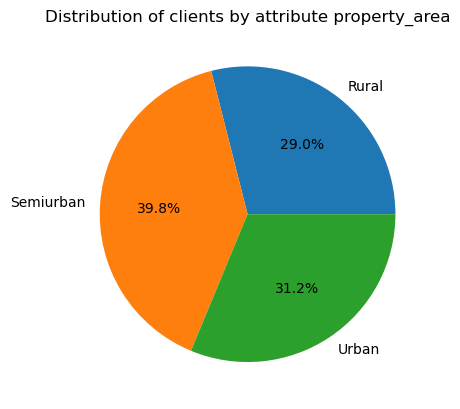

In [292]:
for column in ['gender', 'married','education','self_employed', 'dependents', 'credit_history', 'property_area']:
    df = data.groupby(column).agg({'loan_id': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(df['loan_id'], labels=df.index, autopct='%1.1f%%')
    ax1.set_title(f'Distribution of clients by attribute {column}')
    plt.show()

`Most people who take out a loan:`
1. 82.1% are male and 17.9% are female
2. 64.8% are married and 35.2% not married
3. 86.3% are self employed and 13.8% are not 
4. 57.1% have no dependents, 17.7% have 2 dependents, 16.7% have 1 dependents and 8.5% have 3 and more dependents
5. 85.4% have a credit history and 14.7% have not a creditt history
6. 39.8% live in semiurban, 31.2% live in urban and 29% live in rural area

In [293]:
(
    data[['applicantincome','coapplicantincome','loanamount','loan_amount_term' ]]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,applicantincome,coapplicantincome,loanamount,loan_amount_term
count,480.00,480.00,480.00,480.00
min,150.00,0.00,9.00,36.00
max,"81,000.00","33,837.00",600.00,480.00
median,"3,859.00","1,084.50",128.00,360.00


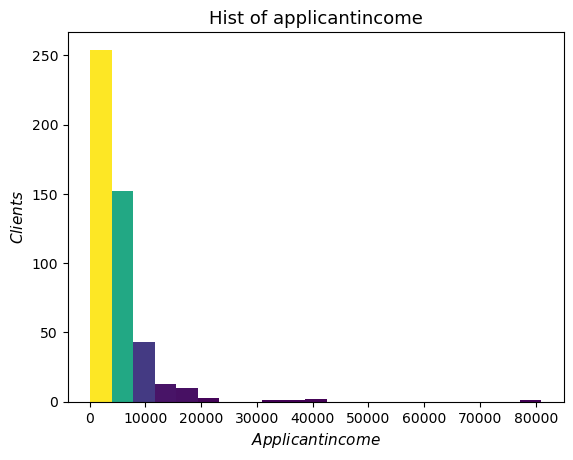

count      480.0
mean      5364.0
std       5668.0
min        150.0
25%       2899.0
50%       3859.0
75%       5852.0
max      81000.0
Name: applicantincome, dtype: float64


In [294]:
ax1 = plt.hist(data['applicantincome'], bins=int(np.sqrt(len(data))))

#N — counter in each bar (column), bins — lower border of the bar
N, bins, patches = plt.hist(data['applicantincome'], bins=int(np.sqrt(len(data))))
                               
#To encode color we will use relative height
fracs = N / N.max()

#normalize fracs to a range between 0 and 1 for a full color range
norm = colors.Normalize(fracs.min(), fracs.max())

#need to loop through the resulting objects and set the color for each individually
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax1 = plt.xlabel('$Applicantincome$', fontsize=11)
ax1 = plt.ylabel('$Clients$', fontsize=11)
plt.title('Hist of applicantincome', fontsize=13)
plt.show()
print(round(data['applicantincome'].describe()))

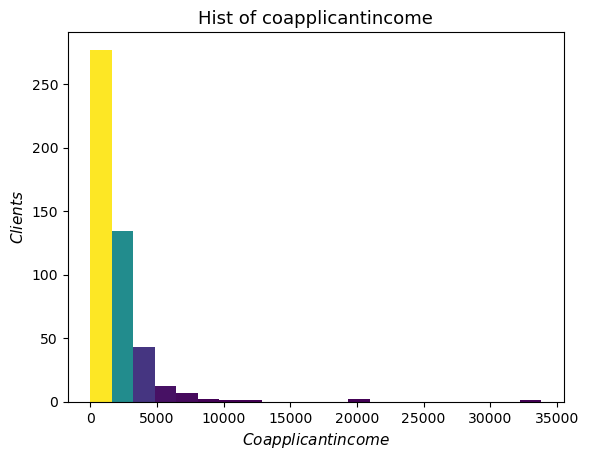

count      480.0
mean      1581.0
std       2618.0
min          0.0
25%          0.0
50%       1084.0
75%       2253.0
max      33837.0
Name: coapplicantincome, dtype: float64


In [295]:
ax1 = plt.hist(data['coapplicantincome'], bins=int(np.sqrt(len(data))))

#N — counter in each bar (column), bins — lower border of the bar
N, bins, patches = plt.hist(data['coapplicantincome'], bins=int(np.sqrt(len(data))))
                               
#To encode color we will use relative height
fracs = N / N.max()

#normalize fracs to a range between 0 and 1 for a full color range
norm = colors.Normalize(fracs.min(), fracs.max())

#need to loop through the resulting objects and set the color for each individually
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax1 = plt.xlabel('$Coapplicantincome$', fontsize=11)
ax1 = plt.ylabel('$Clients$', fontsize=11)
plt.title('Hist of coapplicantincome', fontsize=13)
plt.show()
print(round(data['coapplicantincome'].describe()))

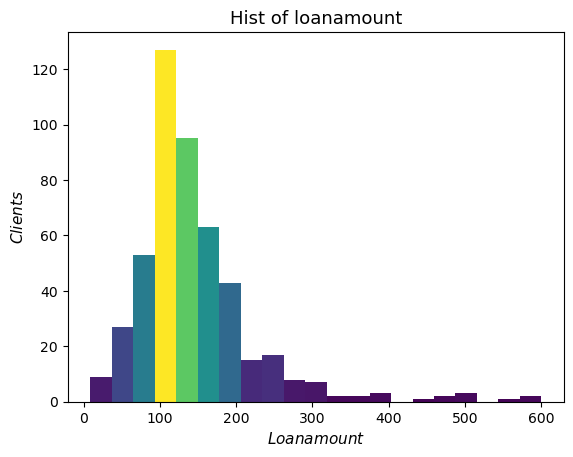

count    480.0
mean     145.0
std       81.0
min        9.0
25%      100.0
50%      128.0
75%      170.0
max      600.0
Name: loanamount, dtype: float64


In [296]:
ax1 = plt.hist(data['loanamount'], bins=int(np.sqrt(len(data))))

#N — counter in each bar (column), bins — lower border of the bar
N, bins, patches = plt.hist(data['loanamount'], bins=int(np.sqrt(len(data))))
                               
#To encode color we will use relative height
fracs = N / N.max()

#normalize fracs to a range between 0 and 1 for a full color range
norm = colors.Normalize(fracs.min(), fracs.max())

#need to loop through the resulting objects and set the color for each individually
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

ax1 = plt.xlabel('$Loanamount$', fontsize=11)
ax1 = plt.ylabel('$Clients$', fontsize=11)
plt.title('Hist of loanamount', fontsize=13)
plt.show()
print(round(data['loanamount'].describe()))

### Correlation

In [297]:
denial_status.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,5730.189189,1773.081081,153.378378,342.810811,0.574324
std,7560.806737,3663.685217,90.339150,72.787021,0.496124
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2863.500000,0.000000,100.000000,360.000000,0.000000
50%,3871.000000,0.000000,128.000000,360.000000,1.000000
75%,6046.250000,2356.250000,178.500000,360.000000,1.000000
max,81000.000000,33837.000000,570.000000,480.000000,1.000000


In [298]:
data['property_area'].replace('Rural',1,inplace= True)
data['property_area'].replace('Semiurban',2,inplace = True)
data['property_area'].replace('Urban',3,inplace=True)
data['gender'].replace('Female',0,inplace = True)
data['gender'].replace('Male',1,inplace=True)
data['married'].replace('No',0,inplace = True)
data['married'].replace('Yes',1,inplace=True)
data['dependents'].replace('0',0,inplace= True)
data['dependents'].replace('1',1,inplace = True)
data['dependents'].replace('2',2,inplace=True)
data['dependents'].replace('3+',3,inplace=True)
data['self_employed'].replace('No',0,inplace = True)
data['self_employed'].replace('Yes',1,inplace=True)
data['loan_status'].replace('No',0,inplace = True)
data['loan_status'].replace('Yes',1,inplace=True)

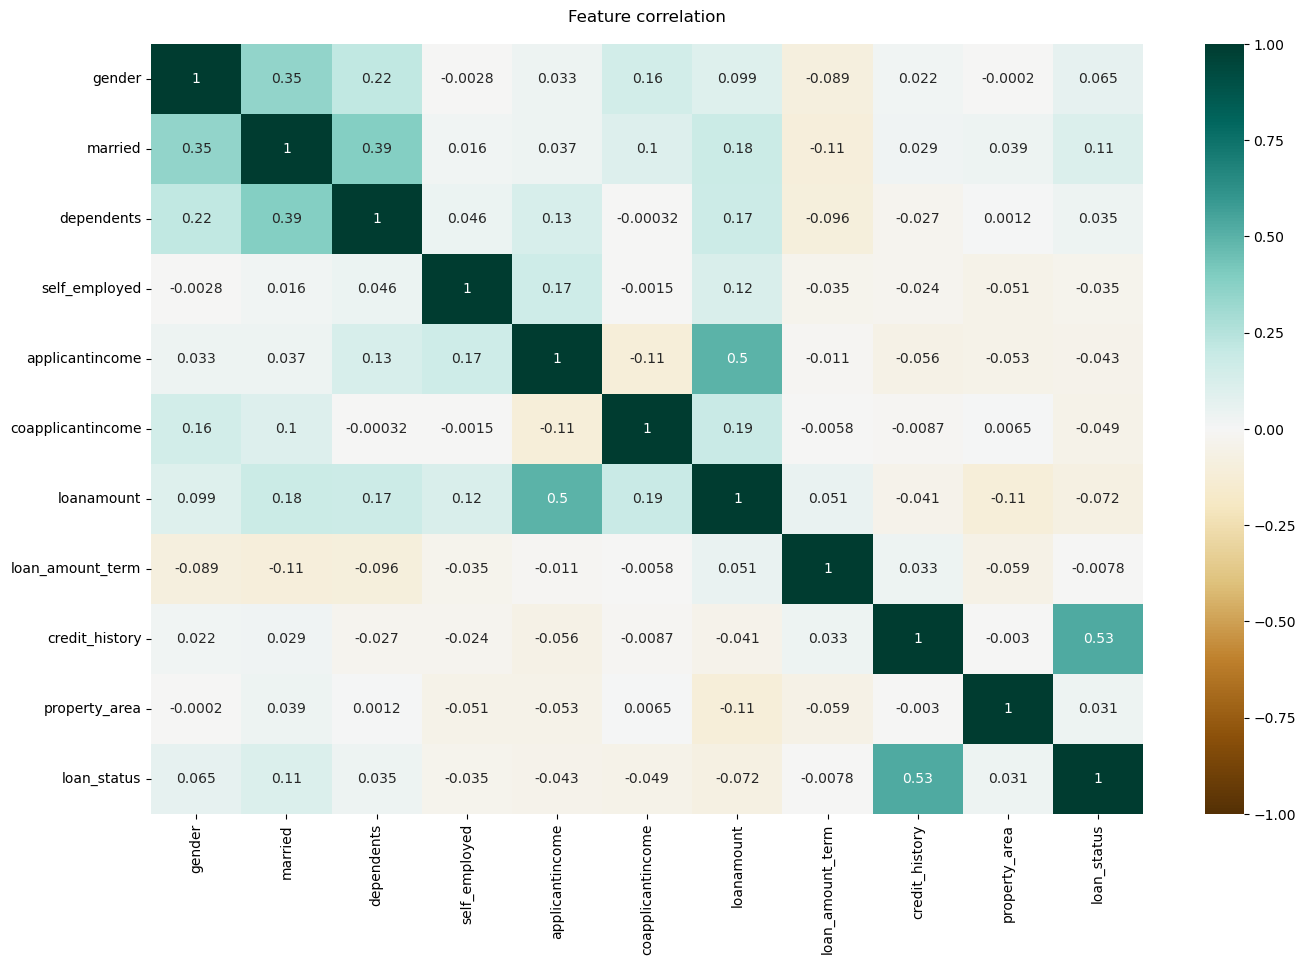

In [299]:
plt.figure(figsize=(16, 10)) 
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 

heatmap.set_title('Feature correlation', fontdict={'fontsize':12}, pad=16);

## Conclusion
People who take out a loan:
- 82.1% are male and 17.9% are female
- 64.8% are married and 35.2% not married
- 86.3% are self employed and 13.8% are not
- 57.1% have no dependents, 17.7% have 2 dependents, 16.7% have 1 dependents and 8.5% have 3 and more dependents
- 85.4% have a credit history and 14.7% have not a creditt history
- 39.8% live in semiurban, 31.2% live in urban and 29% live in rural area
- max applicantincome - 81000, min - 150
- min loan amount term - 36 days, max - 480 days
- min loan amount - 9 thousands, max - 600 thousands

Feature correlation:
- the positive outcome of a loan is most influenced by the presence of a credit history
- marital status has little effect on loan status
- the loan amount is affected by the applicant’s income.